In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from os.path import abspath, join
import sys
root_dir = abspath(join('..'))
sys.path.append(root_dir)
from glob import glob
import vaex
from datetime import datetime
import json
import matplotlib.pyplot as plt
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [2]:
from utils import style

style()

In [3]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [4]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

# asli

In [5]:
boundaries = np.load(join(root_data_dir, "boundaries.npy"))


In [6]:
c_low = boundaries[:, 0]
c_high = boundaries[:, 1]

c = (c_low + c_high) / 2

In [9]:
def get_bf(path):
    files = glob(join(path, "*.json")) 
    files.sort()
    files = files[:15]
    dm = []
    e_dm = []
    bic = []
    aic = []
    for file in files:
        stats = json.load(open(file))
        log_bf = stats['log_bf']
        e_log_bf = stats['e_log_bf']
        bic.append(stats['bic'])
        aic.append(stats['aic'])
        dm.append(log_bf)
        e_dm.append(e_log_bf)
    dm = np.array(dm)
    e_dm = np.array(e_dm)
    bic = np.array(bic)
    aic = np.array(aic)
    return dm, e_dm, bic, aic

stats_dir = join(root_data_dir, "MCMC", "dm", "stats")
bf_dm, e_bf_dm, bic_dm, aic_dm = get_bf(stats_dir)

stats_dir = join(root_data_dir, "MCMC", "no", "stats")
bf_no, e_bf_no, bic_no, aic_no = get_bf(stats_dir)

stats_dir = join(root_data_dir, "MCMC", "mond", "stats")
bf_mond, e_bf_mond, bic_mond, aic_mond = get_bf(stats_dir)

In [10]:
np.array(bf_no).shape

(15,)

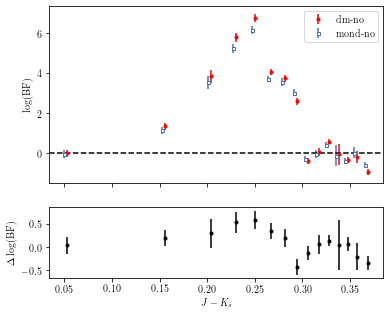

In [56]:
bf_dm_no = bf_dm - bf_no
e_bf_dm_no = np.sqrt(e_bf_dm**2 + e_bf_no**2)

bf_mond_no = bf_mond - bf_no
e_bf_mond_no = np.sqrt(e_bf_mond**2 + e_bf_no**2)
bf_dm_mond = np.array(bf_dm) - np.array(bf_mond)
e_bf_dm_mond = np.sqrt(np.array(e_bf_dm)**2 + np.array(e_bf_no)**2)

fig, ax = plt.subplots(2, 1, figsize=(6, 5), gridspec_kw={'height_ratios': [5, 2]}, sharex=True)
ax[0].errorbar(c, bf_dm_no, yerr=e_bf_dm_no, fmt='.', label='dm-no', color='red')
ax[0].errorbar(c-0.003, bf_mond_no, yerr=e_bf_dm_no, fmt='s', mfc='white', markersize=3,  label='mond-no')
ax[0].axhline(0, color='k', linestyle='--')
ax[0].set_ylabel(r'$\log$(BF)')
ax[0].legend()
plt.errorbar(c, bf_dm_mond, yerr=e_bf_dm_mond, fmt='.', c='k')
# plt.axhline(0, color='k', linestyle='--')
ax[1].set_xlabel(r'$J-K_s$')
ax[1].set_ylabel(r'$\Delta\log$(BF)')
ax[1].set_xlabel(r'$J-K_s$')
# plt.xscale('log')
plt.savefig(join("img", f"bf.pdf"), dpi=70)
plt.show()

In [79]:
from scipy.stats import norm

n_samples = 1_000_000
bf_dm_no_samples = np.empty((len(bf_dm_no), n_samples))
for i, (loc, scale) in enumerate(zip(bf_dm_no, e_bf_dm_no)):
    bf_dm_no_samples[i] = norm.rvs(size=n_samples, loc=loc, scale=scale)
bf_dm_no_samples = bf_dm_no_samples.reshape(-1)
bf_dm_no_samples

array([ 0.00942892,  0.37914429, -0.16532779, ..., -0.91662894,
       -1.00513641, -0.75786271])

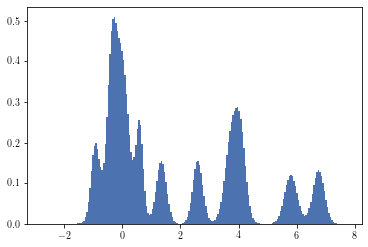

In [81]:
plt.hist(bf_dm_no_samples, bins=200, density=True);

In [85]:
print(f"Rata-rata & {bf_dm_no_samples.mean():.02f} \\\\")
print(f"Median & {np.median(bf_dm_no_samples):.02f} \\\\")
print(f"Std & {bf_dm_no_samples.std():.02f} \\\\")

Rata-rata & 1.80 \\
Median & 0.62 \\
Std & 2.41 \\


In [82]:
n_samples = 1_000_000
bf_mond_no_samples = np.empty((len(bf_mond_no), n_samples))
for i, (loc, scale) in enumerate(zip(bf_mond_no, e_bf_mond_no)):
    bf_mond_no_samples[i] = norm.rvs(size=n_samples, loc=loc, scale=scale)
bf_mond_no_samples = bf_mond_no_samples.reshape(-1)
bf_mond_no_samples

array([-0.07818802,  0.25662298, -0.40812616, ..., -0.60352042,
       -0.5963524 , -0.58446561])

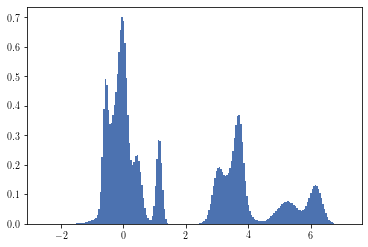

In [83]:
plt.hist(bf_mond_no_samples, bins=200, density=True);

In [86]:
print(f"Rata-rata & {bf_mond_no_samples.mean():.02f} \\\\")
print(f"Median & {np.median(bf_mond_no_samples):.02f} \\\\")
print(f"Std & {bf_mond_no_samples.std():.02f} \\\\")

Rata-rata & 1.70 \\
Median & 0.49 \\
Std & 2.21 \\


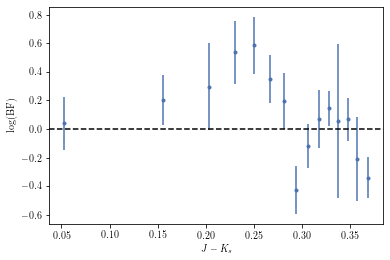

In [12]:
bf_dm_mond = np.array(bf_dm) - np.array(bf_mond)
e_bf_dm_mond = np.sqrt(np.array(e_bf_dm)**2 + np.array(e_bf_no)**2)

plt.errorbar(c, bf_dm_mond, yerr=e_bf_dm_mond, fmt='.')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel(r'$J-K_s$')
plt.ylabel(r'$\log$(BF)')
# plt.xscale('log')
plt.show()

In [74]:
from scipy.stats import norm

n_samples = 1_000_000
bf_samples = np.empty((len(bf_dm_mond), n_samples))
for i, (loc, scale) in enumerate(zip(bf_dm_mond, e_bf_dm_mond)):
    bf_samples[i] = norm.rvs(size=n_samples, loc=loc, scale=scale)
bf_samples = bf_samples.reshape(-1)
bf_samples

array([ 0.16053236,  0.1652538 , -0.05738293, ..., -0.20600693,
       -0.18433772, -0.14239635])

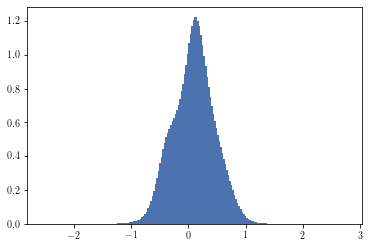

In [75]:
plt.hist(bf_samples, bins=200, density=True);

In [87]:
print(f"Rata-rata & {bf_samples.mean():.02f} \\\\")
print(f"Median & {np.median(bf_samples):.02f} \\\\")
print(f"Std & {bf_samples.std():.02f} \\\\")

Rata-rata & 0.10 \\
Median & 0.11 \\
Std & 0.37 \\


In [18]:
def get_pred(path):
    files = glob(join(path, "*.json")) 
    files.sort()
    dm = []
    for file in files:
        stats = json.load(open(file))
        pred = stats['predictive_posterior']
        dm.append(pred)
    return np.array(dm) 

stats_dir = join(root_data_dir, "MCMC", "dm", "stats")
pred_dm = get_pred(stats_dir)

stats_dir = join(root_data_dir, "MCMC", "dddm", "stats")
pred_dddm = get_pred(stats_dir)

stats_dir = join(root_data_dir, "MCMC-no", "no", "stats")
pred_no = get_pred(stats_dir)
pred_no

array([-13.10008682, -25.37680407, -20.27973582, -19.6242022 ,
       -20.20488146, -33.88088934, -22.72740942, -21.58698332,
       -36.00773413, -37.27165216, -29.43132435, -44.8896082 ,
       -31.56651125, -29.72203898, -31.83286626])

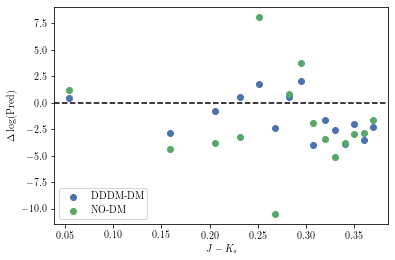

In [19]:
pred_no_dm = pred_no - pred_dm
pred_dddm_dm = pred_dddm - pred_dm
plt.scatter(c, pred_dddm_dm, label='DDDM-DM')
plt.scatter(c, pred_no_dm, label='NO-DM')
plt.axhline(0, color='k', linestyle='--')
# plt.plot(zs, pred_dm, label='DM')
# plt.plot(zs, pred_dddm, label='DDDM')
# plt.plot(zs, pred_no, label='NO')
plt.xlabel('$J-K_s$')
plt.ylabel(r'$\Delta \log$(Pred)')
plt.legend(loc='lower left')
plt.savefig(join("img", f"pred.pdf"), dpi=70)
plt.show()

In [20]:
for i in range(len(c)):
    print(f"$[{c_low[i]:.03f},{c_high[i]:.03f}]$ & {bf_dm_dddm[i]:.02f} & {bf_dm_no[i]:.02f} & {pred_dddm_dm[i]:.02f} & {pred_no_dm[i]:.02f} \\\\")

$[-0.019,0.127]$ & -0.07 & -0.44 & 0.47 & 1.23 \\
$[0.127,0.190]$ & 0.01 & 0.02 & -2.87 & -4.33 \\
$[0.190,0.220]$ & 0.07 & -2.37 & -0.78 & -3.76 \\
$[0.220,0.242]$ & -0.32 & -5.72 & 0.54 & -3.24 \\
$[0.242,0.260]$ & 0.23 & -5.79 & 1.75 & 8.16 \\
$[0.260,0.276]$ & 0.45 & -4.47 & -2.37 & -10.50 \\
$[0.276,0.289]$ & 0.20 & -2.27 & 0.57 & 0.82 \\
$[0.289,0.301]$ & 0.76 & -1.51 & 2.04 & 3.74 \\
$[0.301,0.313]$ & 0.62 & 0.06 & -3.98 & -1.92 \\
$[0.313,0.325]$ & 0.22 & 0.12 & -1.59 & -3.43 \\
$[0.325,0.335]$ & -0.15 & -0.22 & -2.55 & -5.05 \\
$[0.335,0.345]$ & 0.30 & 0.30 & -3.83 & -3.79 \\
$[0.345,0.355]$ & -0.20 & 0.48 & -1.99 & -2.90 \\
$[0.355,0.365]$ & 0.81 & 0.33 & -3.48 & -2.80 \\
$[0.365,0.374]$ & 0.28 & 0.83 & -2.23 & -1.64 \\


In [21]:
print(f"Rata-rata & {bf_dm_dddm.mean():.02f} & {bf_dm_no.mean():.02f} & {pred_dddm_dm.mean():.02f} & {pred_no_dm.mean():.02f} \\\\")

Rata-rata & 0.21 & -1.38 & -1.35 & -1.96 \\
